Jean Antonio Ribeiro<br>
RA: 265739

<strong>a) qual foi a ferramenta/linguagem escolhida?</strong>

As ferramentas utilizadas foram Python/Pandas/Numpy. Essas ferramentas de fáácil manutenção.


<strong>b) breve relato do seu processo de instalação/familiarização com a nova ferramenta, incluindo dicas para quem vai usá-la pela primeira vez;</strong>

Via Notebook não há necessidade de instalar as ferramentas, apenas importar as bibliotecas necessárias. Em uma máquina local, faça as instalação das bibliotecas necessária com auxilio da ferramenta pip: 

sudo apt-get install python-pip<br>
sudo pip install numpy<br>
sudo pip install pandas


<strong>c) descrição detalhada da análise realizada, incluindo ilustrações e código se julgar necessário;</strong>

Ver subtópico Média.


<strong>d) sua conclusão após a realização da análise, revisitando a última pergunta da parte 1: os quatro conjuntos de dados correspondem ao mesmo fenômeno?</strong>

Com a linguagem de programação Python e sua bibliotecas, a manipulação de variáveis e calculo dos resultados é facilmente encontrado, tornando uma ótima ferramenta para pessoas iniciantes na área. O objetivo do estudo da correlação é determinar o grau de relacionamento entre duas variáveis ou colunas. Caso os pontos das variáveis, representados num plano cartesiano (X, Y) ou gráfico de dispersão, apresentem uma dispersão ao longo de uma reta imaginária, dizemos que os dados apresentam uma correlação linear. Por sua vez, a média calcula valores de um único conjunto de valores, sem relação com outro conjunto de valores. Como os valores são próximos e possuem uma correlação positiva forte entre elas, percebe-se os quatro conjuntos de valores podem representar o mesmo fenômeno. A análise é do tipo amostral.

A Correlação entre duas variáveis de tipo quantitativo descreve a associação entre essas variáveis. O Coeficiciente de correlação amostral de Pearson, representado por r, é uma medida da direção e grau com que duas variáveis, de tipo quantitativo, se associam linearmente. O valor do coeficiente de correlação assume valores entre -1 e 1 e quanto maior for o valor de r, em módulo, maior será o grau de associação linear entre as variáveis. 

O Coeficiente de correlação populacional de Pearson, ρ, entre duas variáveis aleatórias X e Y, com desvio padrão diferente de zero, mede a direção e o grau com que as variáveis se associam linearmente. O valor de coeficiente de correlação populacional assume valores no intervalo [-1,1].

In [ ]:
# http://artedosdados.blogspot.com/2015/01/matriz-de-correlacao-em-python.html
# https://felipegalvao.com.br/pt/blog/descriptive-statistics-with-python/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix, auc, precision_recall_curve, precision_score, recall_score, f1_score
from google.colab import drive

drive.mount('/content/drive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/DataSet/bemocsna.csv")
df.head()

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47


In [ ]:
baseline_df = df[['x1', 'y1']].dropna()
baseline_df.head()

,x1,y1
0,10,8.04
1,8,6.95
2,13,7.58
3,9,8.81
4,11,8.33


<strong>3. Com base nas estatísticas descritivas de média e correlação das variáveis, você diria que os quatro conjuntos de valores representam o mesmo fenômeno?</strong>

Sim, já que os valores são próximos e possuem uma correlação positiva forte entre as variáveis, percebe-se os conjuntos de valores podem representar o mesmo fenômeno.

O objetivo do estudo da correlação é determinar o grau de relacionamento entre duas variáveis ou colunas. Caso os pontos das variáveis, representados num plano cartesiano (X, Y) ou gráfico de dispersão, apresentem uma dispersão ao longo de uma reta imaginária, dizemos que os dados apresentam uma correlação linear. Por sua vez, a média calcula valores de um único conjunto de valores, sem relação com outro conjunto de valores. 

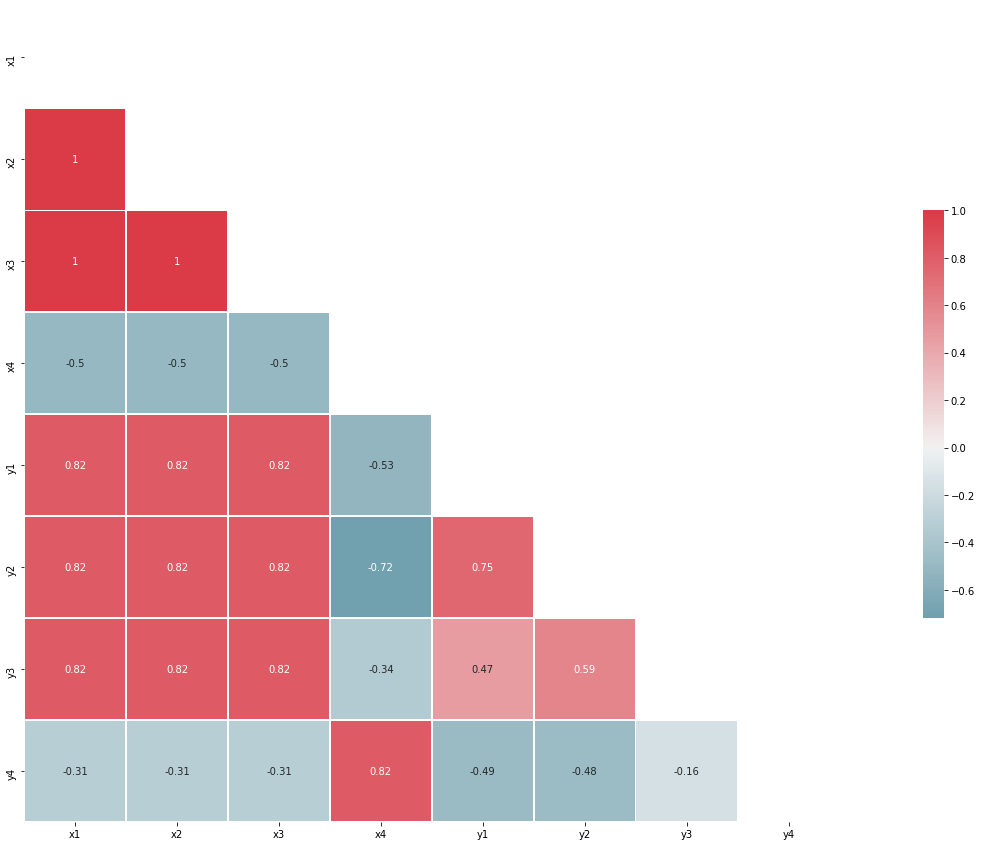

In [ ]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5});

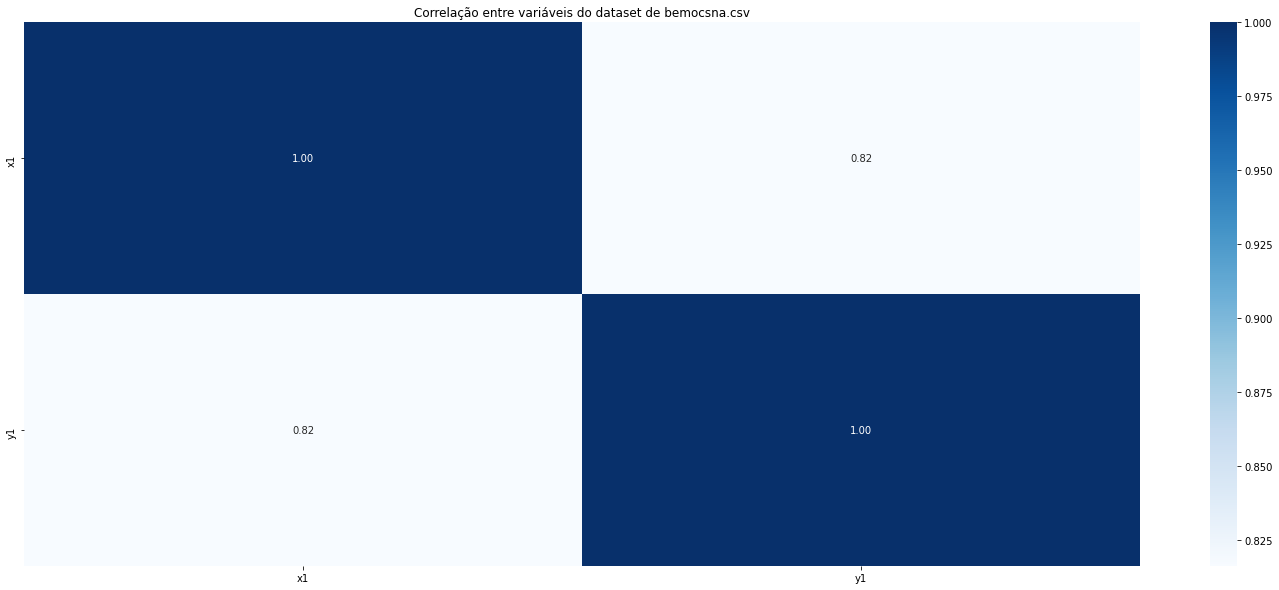

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25, 10))

sns.heatmap(baseline_df.corr(), annot = True, fmt = '.2f', cmap='Blues')
plt.title('Correlação entre variáveis do dataset de bemocsna.csv')
plt.show()

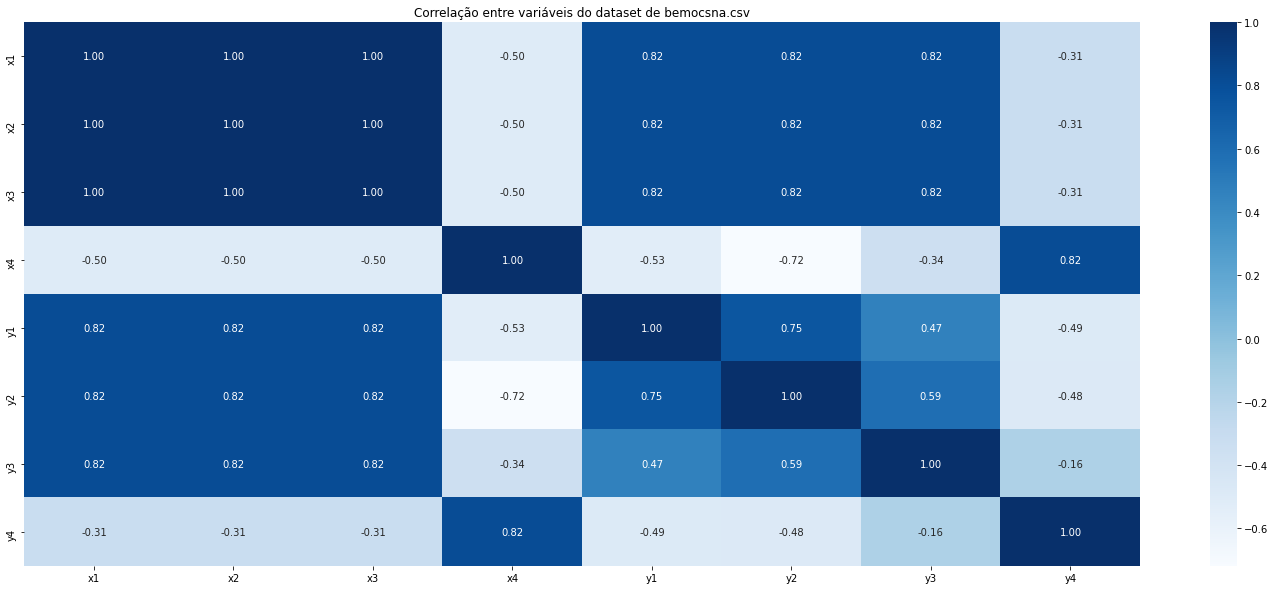

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25, 10))

sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap='Blues')
plt.title('Correlação entre variáveis do dataset de bemocsna.csv')
plt.show()

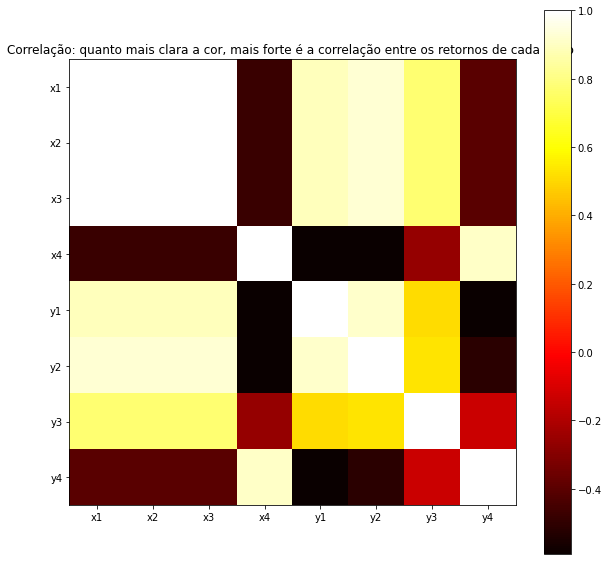

In [ ]:
#Calculo das correlacoes dos retornos e criação dos gráficos. 
# quanto mais clara a cor, mais forte é a correlação entre os retornos de cada ativo 
rets3 = df[:].pct_change()
corr = rets3.corr()
plt.figure(figsize=(10, 10))
plt.title('Correlação: quanto mais clara a cor, mais forte é a correlação entre os retornos de cada ativo ')
plt.imshow(corr, cmap='hot', interpolation='none')  
plt.colorbar()  
plt.xticks(range(len(corr)), corr.columns)  
plt.yticks(range(len(corr)), corr.columns);  
plt.savefig("correl.png")  
plt.show()

# Correlação

In [ ]:
print(df.corr())

          x1        x2        x3  ...        y2        y3        y4
x1  1.000000  1.000000  1.000000  ...  0.816236  0.816287 -0.314047
x2  1.000000  1.000000  1.000000  ...  0.816236  0.816287 -0.314047
x3  1.000000  1.000000  1.000000  ...  0.816236  0.816287 -0.314047
x4 -0.500000 -0.500000 -0.500000  ... -0.718437 -0.344661  0.816521
y1  0.816421  0.816421  0.816421  ...  0.750005  0.468717 -0.489116
y2  0.816236  0.816236  0.816236  ...  1.000000  0.587919 -0.478095
y3  0.816287  0.816287  0.816287  ...  0.587919  1.000000 -0.155472
y4 -0.314047 -0.314047 -0.314047  ... -0.478095 -0.155472  1.000000

[8 rows x 8 columns]


# Covariância

In [ ]:
print(df.cov())

           x1         x2         x3  ...        y2        y3        y4
x1  10.000000  10.000000  10.000000  ...  5.000000  4.997273 -1.922727
x2  10.000000  10.000000  10.000000  ...  5.000000  4.997273 -1.922727
x3  10.000000  10.000000  10.000000  ...  5.000000  4.997273 -1.922727
x4  -5.000000  -5.000000  -5.000000  ... -4.400909 -2.110000  4.999091
y1   5.000909   5.000909   5.000909  ...  2.814190  1.757664 -1.834301
y2   5.000000   5.000000   5.000000  ...  3.752390  2.204764 -1.793046
y3   4.997273   4.997273   4.997273  ...  2.204764  3.747836 -0.582727
y4  -1.922727  -1.922727  -1.922727  ... -1.793046 -0.582727  3.748408

[8 rows x 8 columns]


# Média

In [ ]:
print(df['x1'].mean(), df['x2'].mean(), df['x3'].mean(), df['x4'].mean())
print(df['y1'].mean(), df['y2'].mean(), df['y3'].mean(), df['y4'].mean())

9.0 9.0 9.0 9.0
7.500833333333335 7.5008333333333335 7.500000000000001 7.500833333333333


In [ ]:
print("%.3f, %.3f, %.3f, %.3f" % (df['x1'].mean(),df['x2'].mean(),df['x3'].mean(),df['x4'].mean()))
print("%.3f, %.3f, %.3f, %.3f" % (df['y1'].mean(),df['y2'].mean(),df['y3'].mean(),df['y4'].mean()))

9.000, 9.000, 9.000, 9.000
7.501, 7.501, 7.500, 7.501


# Mediana e Quantil

In [ ]:
print(df['x1'].median(), df['x2'].median(), df['x3'].median(), df['x4'].median())
print(df['y1'].median(), df['y2'].median(), df['y3'].median(), df['y4'].median())

9.0 9.0 9.0 8.0
7.54 8.120000000000001 7.285 7.27


In [ ]:
print(df['x1'].quantile(q=0.25), df['x2'].quantile(q=0.25), df['x3'].quantile(q=0.25), df['x4'].quantile(q=0.25))
print(df['y1'].quantile(q=0.25), df['y2'].quantile(q=0.25), df['y3'].quantile(q=0.25), df['y4'].quantile(q=0.25))

6.75 6.75 6.75 8.0
6.6325 6.9775 6.334999999999999 6.375


# Moda

In [ ]:
print(df['x1'].mode(), df['x2'].mode(), df['x3'].mode(), df['x4'].mode())
print(df['y1'].mode(), df['y2'].mode(), df['y3'].mode(), df['y4'].mode())

0    9
dtype: int64 0    9
dtype: int64 0    9
dtype: int64 0    8
dtype: int64
0      4.26
1      4.82
2      5.68
3      6.95
4      7.24
5      7.50
6      7.58
7      8.04
8      8.33
9      8.81
10     9.96
11    10.84
dtype: float64 0     3.10
1     4.74
2     6.13
3     7.26
4     7.50
5     8.10
6     8.14
7     8.74
8     8.77
9     9.13
10    9.14
11    9.26
dtype: float64 0      5.39
1      5.73
2      6.08
3      6.42
4      6.77
5      7.11
6      7.46
7      7.50
8      7.81
9      8.15
10     8.84
11    12.74
dtype: float64 0      5.25
1      5.56
2      5.76
3      6.58
4      6.89
5      7.04
6      7.50
7      7.71
8      7.91
9      8.47
10     8.84
11    12.50
dtype: float64


# Variância

In [ ]:
print(df['x1'].var(), df['x2'].var(), df['x3'].var(), df['x4'].var())
print(df['y1'].var(), df['y2'].var(), df['y3'].var(), df['y4'].var())

10.0 10.0 10.0 10.0
3.752062878787879 3.752390151515151 3.747836363636364 3.7484083333333342


In [ ]:
print("%.3f, %.3f, %.3f, %.3f" % (df['x1'].var(),df['x2'].var(),df['x3'].var(),df['x4'].var()))
print("%.3f, %.3f, %.3f, %.3f" % (df['y1'].var(),df['y2'].var(),df['y3'].var(),df['y4'].var()))

10.000, 10.000, 10.000, 10.000
3.752, 3.752, 3.748, 3.748


# Desvio Padrão

In [ ]:
print(df['x1'].std(), df['x2'].std(), df['x3'].std(), df['x4'].std())
print(df['y1'].std(), df['y2'].std(), df['y3'].std(), df['y4'].std())

3.1622776601683795 3.1622776601683795 3.1622776601683795 3.1622776601683795
1.9370242328860727 1.9371087092662485 1.9359329439927313 1.9360806629201517


In [ ]:
print("%.3f, %.3f, %.3f, %.3f" % (df['x1'].std(),df['x2'].std(),df['x3'].std(),df['x4'].std()))
print("%.3f, %.3f, %.3f, %.3f" % (df['y1'].std(),df['y2'].std(),df['y3'].std(),df['y4'].std()))

3.162, 3.162, 3.162, 3.162
1.937, 1.937, 1.936, 1.936
